### Komal Jaiswal
### Kq2587


### Binary Classification on Credit Card Dataset
Classifying whether default is o or 1


### Step 1: Import Libraries

In [1]:
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


### Step 2: Import Data

In [0]:

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format


creditcard_dataframe = pd.read_csv("CreditCard.csv")

creditcard_dataframe = creditcard_dataframe.reindex(
    np.random.permutation(creditcard_dataframe.index))

In [3]:
creditcard_dataframe.shape

(30000, 25)

In [4]:
creditcard_dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
7945,7946,20000,2,2,1,37,0,0,2,0,0,0,17450,20358,19722,19616,19228,19878,3200,0,830,750,1000,282,1
16536,16537,500000,1,2,2,26,0,0,0,0,0,0,126725,128206,129327,130136,127699,124623,6005,6005,6094,4161,5021,4350,0
26726,26727,150000,1,1,2,26,-2,-1,0,0,-1,-1,600,360,1401,2360,70,420,360,1041,1000,70,660,0,0
16333,16334,60000,2,2,1,36,0,0,0,0,0,0,60299,44659,44291,41241,29534,29297,2000,3042,1433,1012,1029,1074,1
20629,20630,220000,1,1,2,29,0,0,0,0,0,0,26012,25916,24998,23965,23865,23667,1410,1417,1333,731,1019,1045,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,18899,140000,2,5,2,28,0,0,-1,0,0,0,108018,6500,6327,138485,140492,141006,1000,6327,135000,4700,5000,5000,1
11798,11799,50000,2,1,2,27,0,0,0,0,0,0,28387,36276,17445,15575,8075,-589,10000,1031,4050,4000,0,0,0
6637,6638,610000,1,2,1,30,0,0,0,0,0,0,50724,8723,6245,7089,8059,8666,2134,1210,2000,2000,1666,1500,0
2575,2576,180000,1,1,1,48,0,0,0,0,0,0,167140,160707,162477,166861,171083,169365,8000,6000,7000,7000,7000,7000,0


### Step 3: Preprocess
Selecting only useful features for our further analysis

In [0]:
def preprocess_features_creditcard(creditcard_dataframe):
  
  selected_features_creditcard = creditcard_dataframe[
    ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", 
                "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", 
                "BILL_AMT1","BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
                "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]]
    
  processed_features_creditcard = selected_features_creditcard.copy()
  
  return processed_features_creditcard

def preprocess_targets_creditcard(creditcard_dataframe):
  
  output_targets_creditcard = creditcard_dataframe["default payment next month"]
  return output_targets_creditcard

Splitting the dataset in to training and validation and Normalization and Summary of Training/Validation Data

In [6]:
# Choose the first 2400 examples for training.
training_examples = preprocess_features_creditcard(creditcard_dataframe.head(2400))
training_targets = preprocess_targets_creditcard(creditcard_dataframe.head(2400))
scaler = StandardScaler().fit(training_examples.values)
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)


# Choose the 600 examples for validation.
validation_examples = preprocess_features_creditcard(creditcard_dataframe.tail(600))
vscaled = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)
validation_targets = preprocess_targets_creditcard(creditcard_dataframe.tail(600))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())


Training examples summary:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0
mean,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.2,-1.2,-1.1,-3.0,-1.6,-1.8,-1.6,-1.5,-1.5,-1.5,-1.4,-0.8,-0.8,-0.9,-1.0,-1.3,-1.3,-0.4,-0.4,-0.3,-0.3,-0.3,-0.2
25%,-0.9,-1.2,-1.1,-1.1,-0.8,-0.9,-0.7,-0.7,-0.7,-0.6,-0.6,-0.6,-0.7,-0.7,-0.6,-0.6,-0.6,-0.3,-0.3,-0.3,-0.3,-0.3,-0.2
50%,-0.2,0.8,0.2,0.8,-0.2,0.0,0.1,0.1,0.2,0.2,0.2,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
75%,0.6,0.8,0.2,0.8,0.7,0.0,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,-0.0,-0.0,-0.0,-0.0,-0.1,-0.1
max,4.2,0.8,5.2,2.7,3.8,7.2,6.1,6.8,6.1,6.2,7.0,7.9,8.5,8.9,8.6,8.7,9.2,23.7,18.9,22.2,19.1,20.5,20.8


Validation examples summary:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0
mean,-0.0,0.1,-0.1,-0.0,-0.1,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,-0.0,-0.0,-0.0,-0.0,-0.1,0.0,0.1,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,0.9,0.6,0.7,1.0,1.3,0.7,0.8
min,-1.2,-1.2,-1.1,-3.0,-1.6,-1.8,-1.6,-1.5,-1.5,-1.5,-1.4,-0.8,-0.8,-0.8,-0.9,-0.7,-0.9,-0.4,-0.4,-0.3,-0.3,-0.3,-0.2
25%,-0.9,-1.2,-1.1,-1.1,-0.9,-0.9,-0.7,-0.7,-0.7,-0.6,-0.6,-0.7,-0.7,-0.7,-0.7,-0.6,-0.6,-0.3,-0.3,-0.3,-0.3,-0.3,-0.2
50%,-0.2,0.8,0.2,0.8,-0.3,0.0,0.1,0.1,0.2,0.2,0.2,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
75%,0.5,0.8,0.2,0.8,0.6,0.0,0.1,0.1,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.2,0.1,-0.0,-0.1,0.0,-0.0,-0.1,-0.1
max,3.5,0.8,3.9,2.7,3.6,7.2,6.1,5.9,6.1,6.2,6.1,6.3,6.7,9.8,5.6,5.4,5.6,7.1,8.4,12.2,15.4,10.1,10.9


Training targets summary:


count   2400.0
mean       0.2
std        0.4
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        1.0
Name: default payment next month, dtype: float64

Validation targets summary:


count   600.0
mean      0.2
std       0.4
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       1.0
Name: default payment next month, dtype: float64

### First Few Rows of the Training/Validation Data

In [7]:
training_examples

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
7945,-1.1,0.8,0.2,-1.1,0.2,0.0,0.1,1.8,0.2,0.2,0.2,-0.5,-0.4,-0.4,-0.4,-0.3,-0.3,-0.1,-0.4,-0.3,-0.3,-0.2,-0.2
16536,2.6,-1.2,0.2,0.8,-1.0,0.0,0.1,0.1,0.2,0.2,0.2,1.1,1.2,1.3,1.4,1.5,1.5,0.1,0.0,0.1,-0.0,-0.0,-0.1
26726,-0.1,-1.2,-1.1,0.8,-1.0,-1.8,-0.7,0.1,0.2,-0.6,-0.6,-0.7,-0.7,-0.7,-0.6,-0.7,-0.6,-0.4,-0.3,-0.3,-0.3,-0.2,-0.2
16333,-0.8,0.8,0.2,-1.1,0.1,0.0,0.1,0.1,0.2,0.2,0.2,0.2,-0.0,-0.0,-0.0,-0.2,-0.1,-0.2,-0.2,-0.2,-0.3,-0.2,-0.2
20629,0.4,-1.2,-1.1,0.8,-0.7,0.0,0.1,0.1,0.2,0.2,0.2,-0.3,-0.3,-0.3,-0.3,-0.3,-0.2,-0.3,-0.3,-0.2,-0.3,-0.2,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,-0.1,0.8,0.2,-1.1,0.7,-0.9,-0.7,-0.7,-0.7,-0.6,-0.6,-0.7,-0.7,-0.6,-0.6,-0.6,-0.6,-0.2,0.0,-0.1,-0.0,-0.1,-0.1
16043,-0.9,0.8,1.4,-1.1,1.1,-0.9,-0.7,-0.7,-0.7,-0.6,-0.6,-0.7,-0.7,-0.7,-0.7,-0.7,-0.7,-0.4,-0.3,-0.3,-0.3,-0.3,-0.2
15961,-0.4,0.8,-1.1,0.8,-0.5,-0.9,-0.7,-0.7,-0.7,-0.6,0.2,-0.7,-0.7,-0.7,-0.7,-0.7,-0.6,-0.4,-0.3,-0.3,-0.3,-0.3,-0.2
13457,0.7,0.8,0.2,0.8,-0.1,0.9,-1.6,-1.5,-0.7,-0.6,-0.6,-0.7,-0.7,-0.7,-0.5,-0.6,-0.7,-0.4,-0.4,0.2,-0.1,-0.3,1.7


In [8]:
validation_examples

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
7004,0.3,0.8,-1.1,0.8,-0.7,-0.9,-0.7,-0.7,-0.7,1.9,-0.6,-0.3,-0.7,-0.7,-0.6,-0.6,-0.6,-0.3,-0.3,-0.2,-0.3,-0.2,-0.2
19610,0.6,0.8,0.2,-1.1,1.2,0.0,0.1,0.1,0.2,0.2,0.2,1.0,1.1,1.2,1.4,1.5,1.6,0.1,0.1,0.1,0.0,0.0,-0.0
3068,-0.0,0.8,0.2,-1.1,-1.4,0.0,0.1,0.1,0.2,0.2,0.2,0.7,0.3,0.4,0.2,0.1,-0.2,0.4,1.0,-0.2,0.2,-0.2,2.2
11314,-0.9,-1.2,1.4,0.8,-0.6,1.8,0.1,0.1,0.2,0.2,0.2,0.0,0.0,-0.3,-0.4,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.2,-0.2
24,-0.6,-1.2,-1.1,0.8,-1.4,0.0,0.1,0.1,-0.7,0.2,0.2,-0.6,-0.6,-0.7,-0.6,-0.6,-0.5,0.1,-0.4,0.0,-0.3,-0.2,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,-0.2,0.8,3.9,0.8,-0.8,0.0,0.1,-0.7,0.2,0.2,0.2,0.8,-0.6,-0.6,1.6,1.7,1.8,-0.3,0.1,8.4,0.0,-0.0,-0.0
11798,-0.9,0.8,-1.1,0.8,-0.9,0.0,0.1,0.1,0.2,0.2,0.2,-0.3,-0.2,-0.4,-0.4,-0.5,-0.7,0.4,-0.3,-0.1,-0.0,-0.3,-0.2
6637,3.4,-1.2,0.2,-1.1,-0.6,0.0,0.1,0.1,0.2,0.2,0.2,0.0,-0.6,-0.6,-0.6,-0.5,-0.5,-0.2,-0.3,-0.2,-0.2,-0.2,-0.2
2575,0.1,-1.2,-1.1,-1.1,1.4,0.0,0.1,0.1,0.2,0.2,0.2,1.7,1.7,1.8,2.0,2.2,2.3,0.2,0.0,0.1,0.2,0.1,0.0


In [9]:
for col in training_examples.columns: 
    print(col) 

LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6


### Step 4: Build Model

In [0]:
baseline_model_creditcard = keras.Sequential([
    keras.layers.Dense(5, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    #keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1,activation="sigmoid")
  ])



baseline_model_creditcard.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['acc'])

### Fit Model

In [27]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 150
b_history = baseline_model_creditcard.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
..................................................

### Highest Accuracy

In [28]:
print("baseline_train=",max(b_history.history["acc"]))
print("baseline_validation=",max(b_history.history["val_acc"]))

baseline_train= 0.8308333
baseline_validation= 0.825


### Step5: Plot Results

### Plot of accuracy

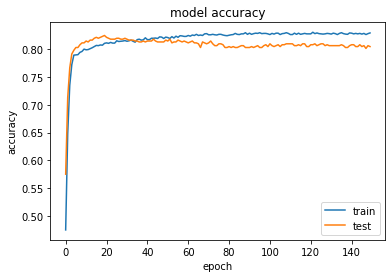

In [29]:
plt.plot(b_history.history["acc"])
plt.plot(b_history.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### Plot for loss

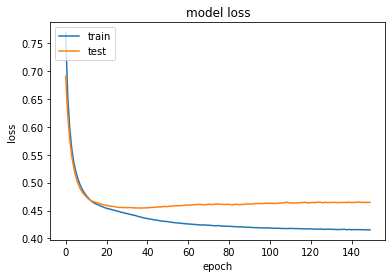

In [30]:
plt.plot(b_history.history["loss"])
plt.plot(b_history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

From the above plot we ca see that the generelization gap between training and testing data is very less.

### Identifying The Baseline

In [15]:
F=creditcard_dataframe[creditcard_dataframe["default payment next month"]==1].shape[0]# No of class with label 1
T=creditcard_dataframe[creditcard_dataframe["default payment next month"]==0].shape[0]#No of class with label 0
base=max(F,T)/(F+T) # Taking the count of largest class and dividing it by total instances to get baseline
base

0.7788

### Validation Accuracy of the Model:

The baseline accuracy is 77.8 . Our model has the highest validation accuracy of 82.8